<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/IMDB-Reviews-NLP/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, GRU
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Reviews/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Preprocessing

In [5]:
def text_cleaner(text):
  # HTML to text format
  soup = BeautifulSoup(text)
  text = soup.get_text()
  return text

In [6]:
data['reveiw'] = data['review'].apply(text_cleaner)

<ipython-input-5-8d42f8a4318a>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text)


In [7]:
enc = LabelEncoder()
y = enc.fit_transform(data['sentiment'])

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['reveiw'])

In [9]:
encoded = tokenizer.texts_to_sequences(data['review'])

In [10]:
len(encoded[1])

164

In [11]:
list_len = []
for seq in encoded:
  list_len.append(len(seq))

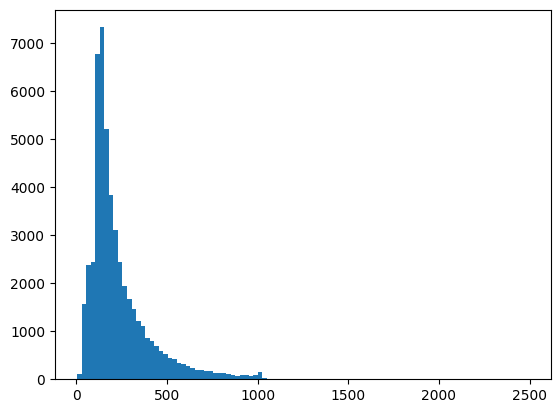

#####################################
mean of tokens 235.0299
median of tokens 176.0


In [12]:
plt.hist(list_len, bins=100)
plt.show()
print('#####################################')
print(f'mean of tokens {np.average(list_len)}')
print(f'median of tokens {np.median(list_len)}')

In [13]:
max_len = 200

In [14]:
X = pad_sequences(encoded, maxlen=max_len, padding='post')

In [15]:
X.shape

(50000, 200)

In [16]:
vocab_len = len(tokenizer.word_index) + 1
vocab_len

126507

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling


In [18]:
reg_e = tf.keras.regularizers.l2(0.001)

model = Sequential()
model.add(Embedding(input_dim=vocab_len, output_dim=50, input_length=max_len, embeddings_regularizer=reg_e))
model.add(GRU(units=128, activation='tanh', recurrent_dropout=0.5, dropout=0.5))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           6325350   
                                                                 
 gru (GRU)                   (None, 128)               69120     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6402791 (24.42 MB)
Trainable params: 64027

In [20]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
loss = tf.losses.BinaryCrossentropy()
metric = tf.metrics.BinaryAccuracy()
model.compile(optimizer=opt, loss=loss, metrics=metric)

In [21]:
model.fit(X_train, y_train, batch_size=50, epochs=7, validation_split=0.2, verbose=2)

Epoch 1/7
640/640 - 416s - loss: 1.9463 - binary_accuracy: 0.5030 - val_loss: 0.7411 - val_binary_accuracy: 0.5199 - 416s/epoch - 650ms/step
Epoch 2/7
640/640 - 395s - loss: 0.7027 - binary_accuracy: 0.5102 - val_loss: 0.6940 - val_binary_accuracy: 0.5210 - 395s/epoch - 617ms/step
Epoch 3/7
640/640 - 399s - loss: 0.6896 - binary_accuracy: 0.5475 - val_loss: 0.6776 - val_binary_accuracy: 0.5800 - 399s/epoch - 624ms/step
Epoch 4/7
640/640 - 410s - loss: 0.5571 - binary_accuracy: 0.7279 - val_loss: 0.3556 - val_binary_accuracy: 0.8575 - 410s/epoch - 640ms/step
Epoch 5/7
640/640 - 396s - loss: 0.3800 - binary_accuracy: 0.8706 - val_loss: 0.3220 - val_binary_accuracy: 0.8802 - 396s/epoch - 619ms/step
Epoch 6/7
640/640 - 398s - loss: 0.3263 - binary_accuracy: 0.8991 - val_loss: 0.3151 - val_binary_accuracy: 0.8844 - 398s/epoch - 622ms/step
Epoch 7/7
640/640 - 392s - loss: 0.3001 - binary_accuracy: 0.9101 - val_loss: 0.3494 - val_binary_accuracy: 0.8825 - 392s/epoch - 613ms/step


# evaluation

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 23s 72ms/step - loss: 0.3324 - binary_accuracy: 0.8904


[0.3323778212070465, 0.8903999924659729]

In [23]:
y_pred = model.predict(X_test)

313/313 [==============================] - 21s 67ms/step


In [24]:
y_pred = np.round(y_pred)

In [25]:
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      4961
    positive       0.89      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [26]:
print(confusion_matrix(y_test, y_pred))

[[4389  572]
 [ 524 4515]]


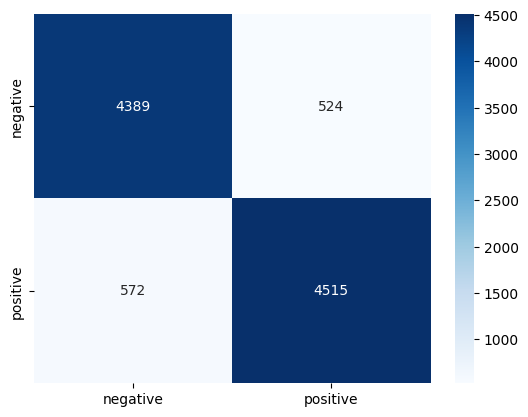

In [27]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['negative', 'positive'],
    yticklabels=['negative', 'positive']
    )
plt.show()